## Titanic
In this notebook, we will be predicting if a passenger survived the titanic accident. <p>We will be using the dataset from kaggle: https://www.kaggle.com/c/titanic <p>
    <p>Also, we will compare how logistic regression and decision tree fare against each other<p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1= pd.read_csv('gender_submission.csv')

In [3]:
df1

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [4]:
train= pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test= pd.read_csv('test.csv')
test=test.merge(df1)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

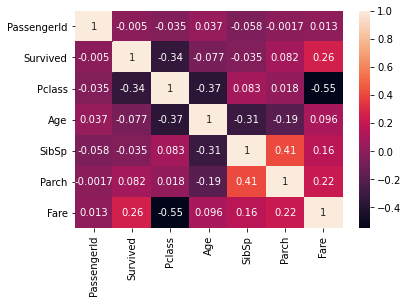

In [10]:
sns.heatmap(train.corr(),annot=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

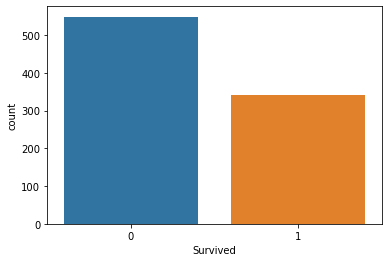

In [11]:
sns.countplot(data=train,x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

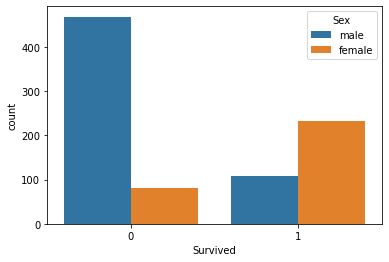

In [12]:
sns.countplot(data=train,x='Survived',hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

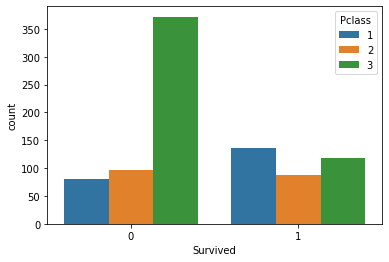

In [13]:
sns.countplot(x='Survived',hue='Pclass',data=train)

### Dealing with missing data

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:xlabel='Age'>

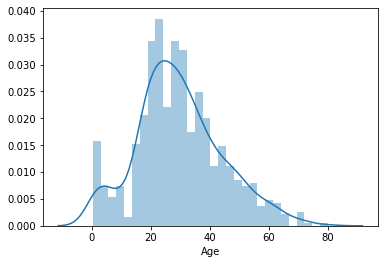

In [16]:
sns.distplot(train.Age,bins=30)

In [17]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [18]:
train['Cabin'].nunique()

147

In [19]:
train['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [20]:
train['Embarked'].nunique()

3

<AxesSubplot:xlabel='Embarked', ylabel='count'>

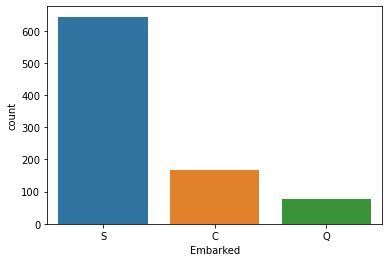

In [21]:
sns.countplot(data=train,x='Embarked')

In [22]:
train['Age'].fillna((train['Age'].mean()), inplace=True)

In [23]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
train.drop('Cabin',axis=1,inplace=True)

In [25]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [26]:
train.dropna(inplace=True)

In [27]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
train=pd.get_dummies(train,columns=['Sex'])

In [29]:
train.drop('Sex_female',axis=1,inplace=True)

In [30]:
train=pd.get_dummies(train,columns=['Embarked'])

In [31]:
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,1,1,0,0


In [32]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [33]:
test.drop('Cabin',axis=1,inplace=True)

In [34]:
test['Age'].fillna((test['Age'].mean()), inplace=True)

In [35]:
test.dropna(inplace=True)

In [36]:
test=pd.get_dummies(test,columns=['Sex'])

In [37]:
test.drop('Sex_female',axis=1,inplace=True)

In [38]:
test=pd.get_dummies(test,columns=['Embarked'])

In [39]:
test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Survived,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",30.27259,0,0,A.5. 3236,8.0500,0,1,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,PC 17758,108.9000,1,0,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0,1,0,0,1
416,1308,3,"Ware, Mr. Frederick",30.27259,0,0,359309,8.0500,0,1,0,0,1


### Predicting which passenger survived with Logistic regression

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train = train[['Pclass', 'Age', 'SibSp','Parch', 'Fare','Sex_male','Embarked_C','Embarked_Q','Embarked_S']]
y_train = train['Survived']
X_test= test[['Pclass', 'Age', 'SibSp','Parch', 'Fare','Sex_male','Embarked_C','Embarked_Q','Embarked_S']]
y_test = test['Survived']

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42)

In [44]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [45]:
predictions = logmodel.predict(X_test)

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       141
           1       0.70      0.74      0.72        82

    accuracy                           0.79       223
   macro avg       0.77      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



### Predicting which passenger survived with decision tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
decision_tree = DecisionTreeClassifier()

In [50]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
predictions = decision_tree.predict(X_test)

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       141
           1       0.64      0.73      0.68        82

    accuracy                           0.75       223
   macro avg       0.73      0.75      0.74       223
weighted avg       0.76      0.75      0.75       223



In [61]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
from io import StringIO
import pydot 

features = list(train[['Pclass', 'Age', 'SibSp','Parch', 'Fare','Sex_male','Embarked_C','Embarked_Q','Embarked_S']])
features

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

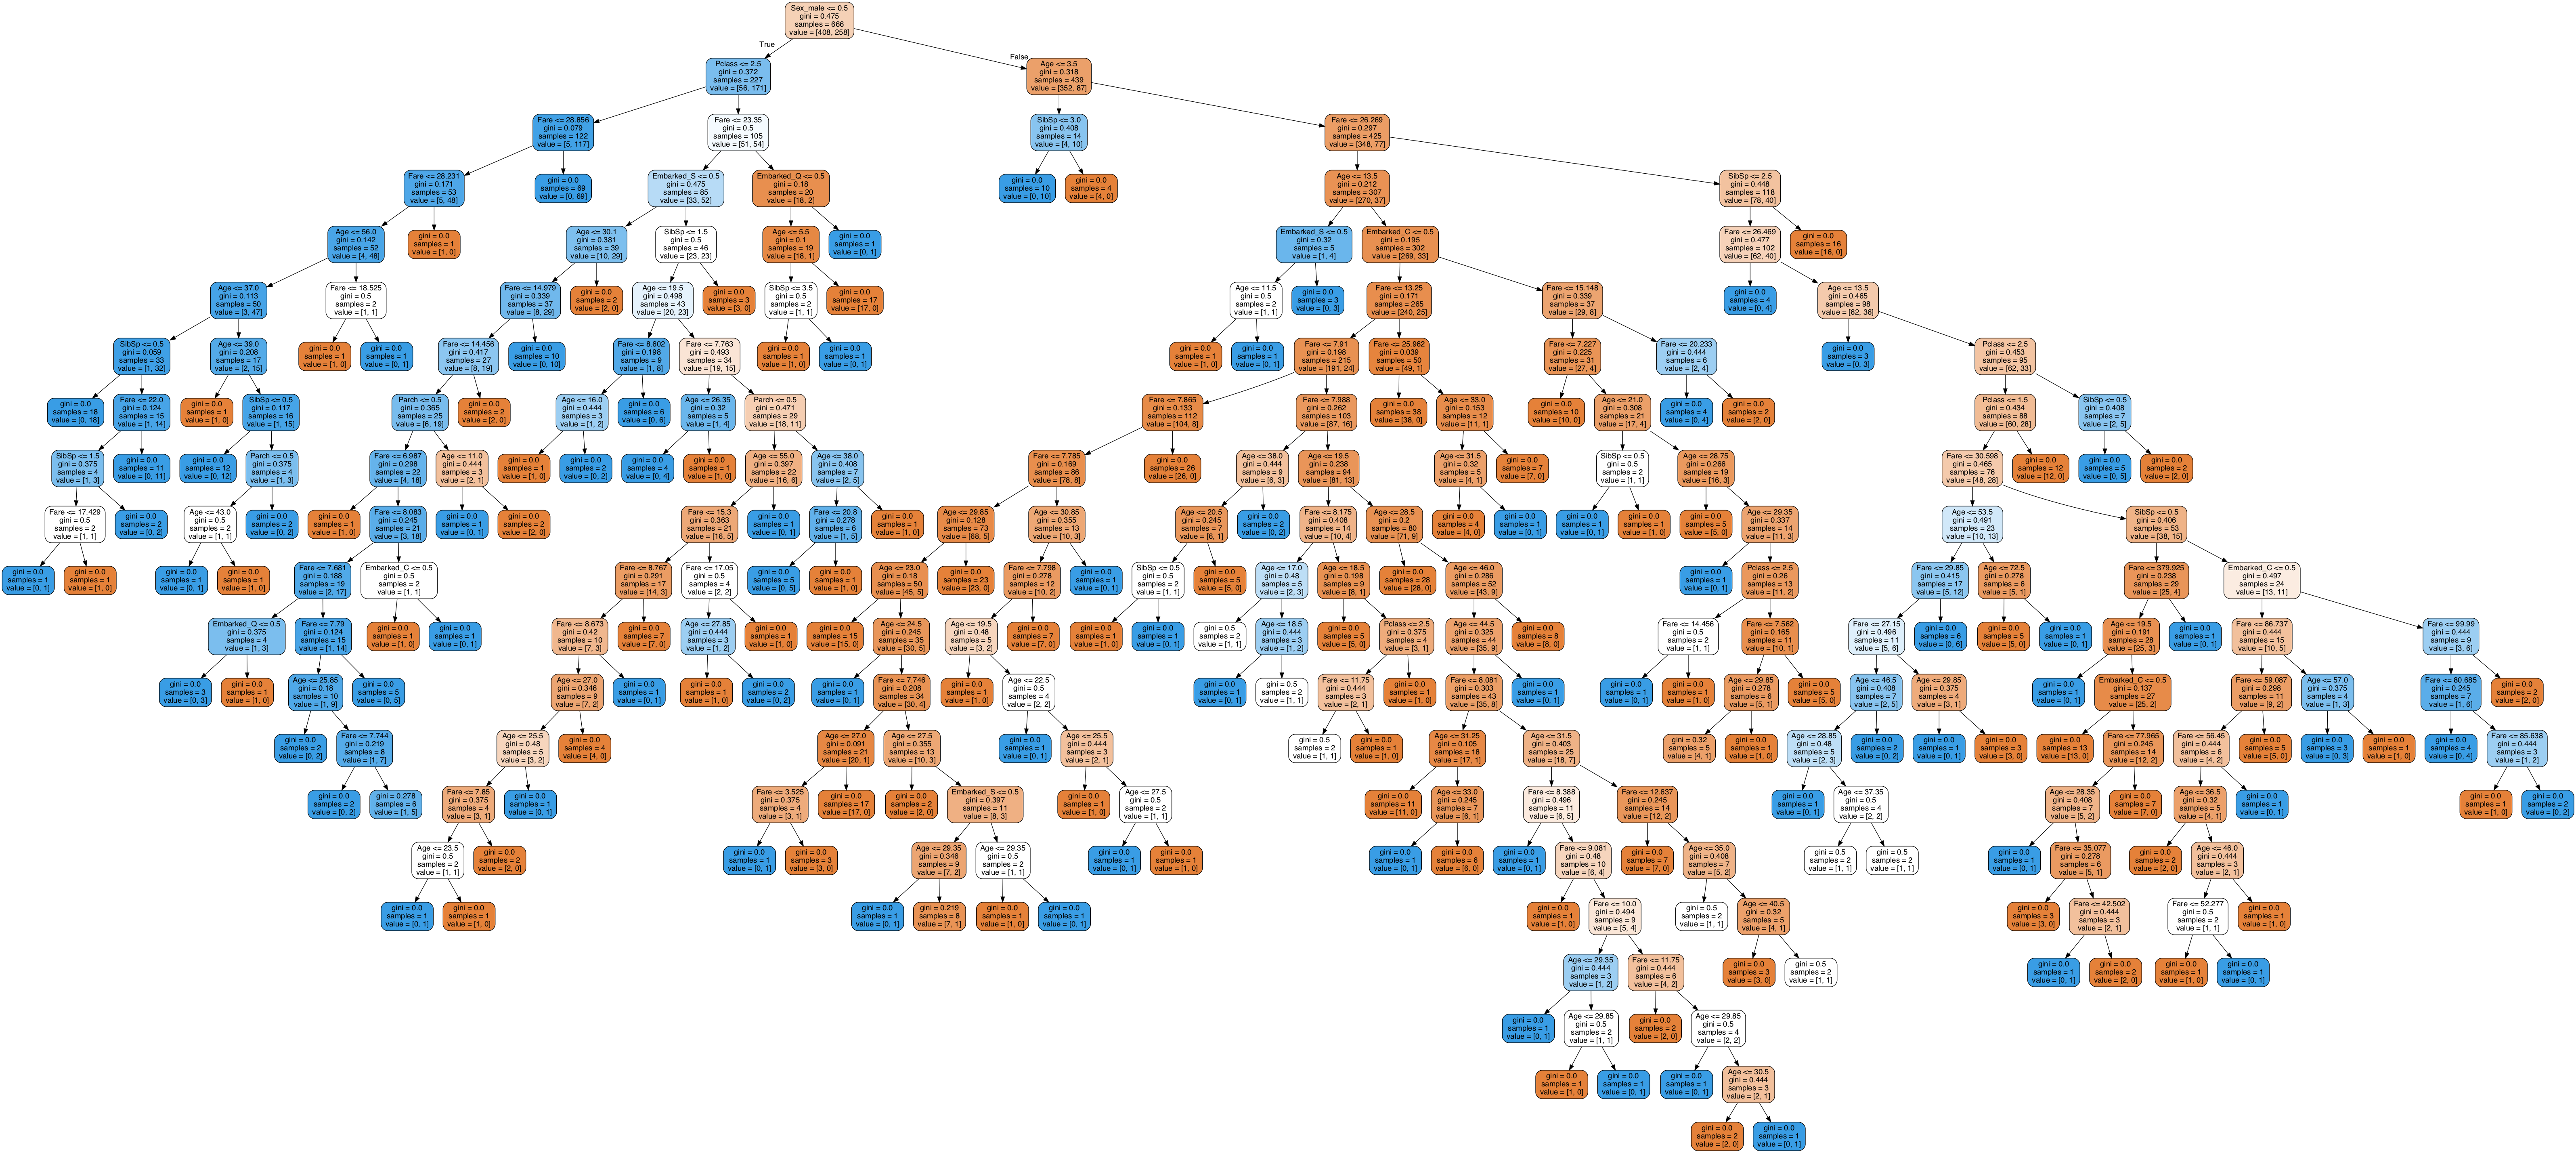

In [63]:
dot_data = StringIO()  
export_graphviz(decision_tree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

### Result comparison
It seems like the logistic regression model did better than the decision tree. Looking at the classification report for each model, we can see that logistic regression has a better accuracy